In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [14]:
# Load production data from CSV
data = pd.read_csv('production_data.csv')

# Preview the data
print("First few rows of the dataset:")
print(data.head())

# Extract time and q as numpy arrays
t = data['time'].values
q_obs = data['q'].values


First few rows of the dataset:
   time     q
0     0  1000
1     1   950
2     2   905
3     3   860
4     4   820


In [15]:
# Define Arps model functions

# Exponential Decline
def arps_exponential(t, qi, Di):
    return qi * np.exp(-Di * t)

# Harmonic Decline (b = 1)
def arps_harmonic(t, qi, Di):
    return qi / (1 + Di * t)

# Hyperbolic Decline (general case)
def arps_hyperbolic(t, qi, Di, b):
    return qi * (1 + b * Di * t)**(-1 / b)


In [16]:
#  Fit all three models to the observed data

# Initial guesses for parameters
exp_guess = [1000, 0.05]
harm_guess = [1000, 0.05]
hyper_guess = [1000, 0.05, 0.5]

# Fit exponential
popt_exp, _ = curve_fit(arps_exponential, t, q_obs, p0=exp_guess)
qi_exp, Di_exp = popt_exp

# Fit harmonic
popt_harm, _ = curve_fit(arps_harmonic, t, q_obs, p0=harm_guess)
qi_harm, Di_harm = popt_harm

# Fit hyperbolic
popt_hyper, _ = curve_fit(arps_hyperbolic, t, q_obs, p0=hyper_guess, bounds=(0, [np.inf, 1, 1]))
qi_hyper, Di_hyper, b_hyper = popt_hyper

# Print fitted parameters
print("Fitted Parameters:")
print(f"Exponential: qi = {qi_exp:.2f}, Di = {Di_exp:.4f}")
print(f"Harmonic   : qi = {qi_harm:.2f}, Di = {Di_harm:.4f}")
print(f"Hyperbolic : qi = {qi_hyper:.2f}, Di = {Di_hyper:.4f}, b = {b_hyper:.4f}")


Fitted Parameters:
Exponential: qi = 1002.39, Di = 0.0512
Harmonic   : qi = 1020.86, Di = 0.0676
Hyperbolic : qi = 1002.38, Di = 0.0512, b = 0.0000


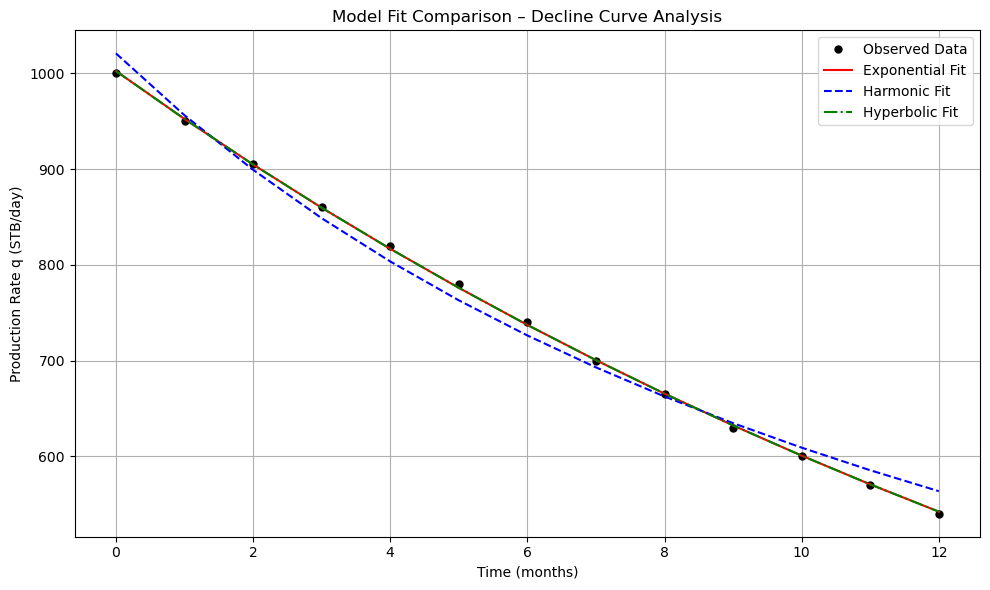

In [17]:
# Plot all fitted models vs. actual data

# Generate fitted values
q_exp_fit = arps_exponential(t, qi_exp, Di_exp)
q_harm_fit = arps_harmonic(t, qi_harm, Di_harm)
q_hyper_fit = arps_hyperbolic(t, qi_hyper, Di_hyper, b_hyper)

plt.figure(figsize=(10, 6))
plt.plot(t, q_obs, 'ko', label='Observed Data', markersize=5)
plt.plot(t, q_exp_fit, 'r-', label='Exponential Fit')
plt.plot(t, q_harm_fit, 'b--', label='Harmonic Fit')
plt.plot(t, q_hyper_fit, 'g-.', label='Hyperbolic Fit')

plt.xlabel('Time (months)')
plt.ylabel('Production Rate q (STB/day)')
plt.title('Model Fit Comparison – Decline Curve Analysis')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Calculate RMSE for each model
rmse_exp = np.sqrt(mean_squared_error(q_obs, q_exp_fit))
rmse_harm = np.sqrt(mean_squared_error(q_obs, q_harm_fit))
rmse_hyper = np.sqrt(mean_squared_error(q_obs, q_hyper_fit))

# Print RMSEs
print("\nModel RMSE Comparison:")
print(f"Exponential RMSE: {rmse_exp:.2f}")
print(f"Harmonic   RMSE: {rmse_harm:.2f}")
print(f"Hyperbolic RMSE: {rmse_hyper:.2f}")

# Determine the best model
rmse_dict = {
    'Exponential': rmse_exp,
    'Harmonic': rmse_harm,
    'Hyperbolic': rmse_hyper
}

best_model = min(rmse_dict, key=rmse_dict.get)
print(f"\n Best-fitting model based on RMSE: {best_model}")



Model RMSE Comparison:
Exponential RMSE: 2.10
Harmonic   RMSE: 13.42
Hyperbolic RMSE: 2.10

 Best-fitting model based on RMSE: Hyperbolic
